# LetsGrowMoreVIP - Data Science Internship
## intermediate level task-8 next word prediction
# Author - Pawan suthar

#### Importing packages

In [47]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

#### Loading the data

In [48]:
path = 'dataset.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


#### Data Preprocessing

In [49]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
print(f'unique chars: {len(character)}')

unique chars: 73


##### chunk 40 characters with 3 sequences

In [50]:
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'number training examples: {len(sentences)}')

number training examples: 193950


####  generating our features and labels

In [51]:
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


'e'

In [52]:
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [53]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [54]:
X.shape

(193950, 40, 73)

In [55]:
y.shape

(193950, 73)

#### Creating the model

In [56]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               103424    
                                                                 
 dense_2 (Dense)             (None, 73)                9417      
                                                                 
 activation_2 (Activation)   (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


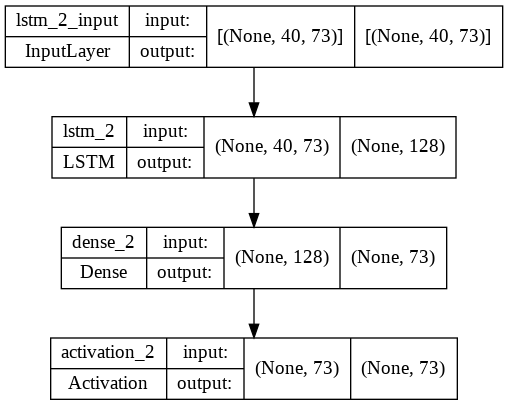

In [57]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

#### Training our model

In [58]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=30, 
                    shuffle=True).history

Epoch 1/30
1501/1501 [==============================] - 24s 14ms/step - loss: 1.9455 - accuracy: 0.4283 - val_loss: 2.1728 - val_accuracy: 0.3928
Epoch 2/30
1501/1501 [==============================] - 21s 14ms/step - loss: 1.6138 - accuracy: 0.5173 - val_loss: 2.0814 - val_accuracy: 0.4320
Epoch 3/30
1501/1501 [==============================] - 21s 14ms/step - loss: 1.5199 - accuracy: 0.5424 - val_loss: 2.0144 - val_accuracy: 0.4588
Epoch 4/30
1501/1501 [==============================] - 21s 14ms/step - loss: 1.4708 - accuracy: 0.5570 - val_loss: 1.9678 - val_accuracy: 0.4773
Epoch 5/30
1501/1501 [==============================] - 21s 14ms/step - loss: 1.4369 - accuracy: 0.5649 - val_loss: 1.9763 - val_accuracy: 0.4742
Epoch 6/30
1501/1501 [==============================] - 22s 15ms/step - loss: 1.4120 - accuracy: 0.5720 - val_loss: 1.9703 - val_accuracy: 0.4881
Epoch 7/30
1501/1501 [==============================] - 22s 15ms/step - loss: 1.3942 - accuracy: 0.5772 - val_loss: 1.9426 -

#### saving our model

In [59]:
model.save('keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

#### loading our model

In [60]:
model = load_model('keras_model.h5')
history = pickle.load(open("history.p", "rb"))

#### Model Evaluation

In [61]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 38s 6ms/step - loss: 1.2232 - accuracy: 0.6229
Test Loss 1.2231892347335815
Test Accuracy 0.6229337453842163


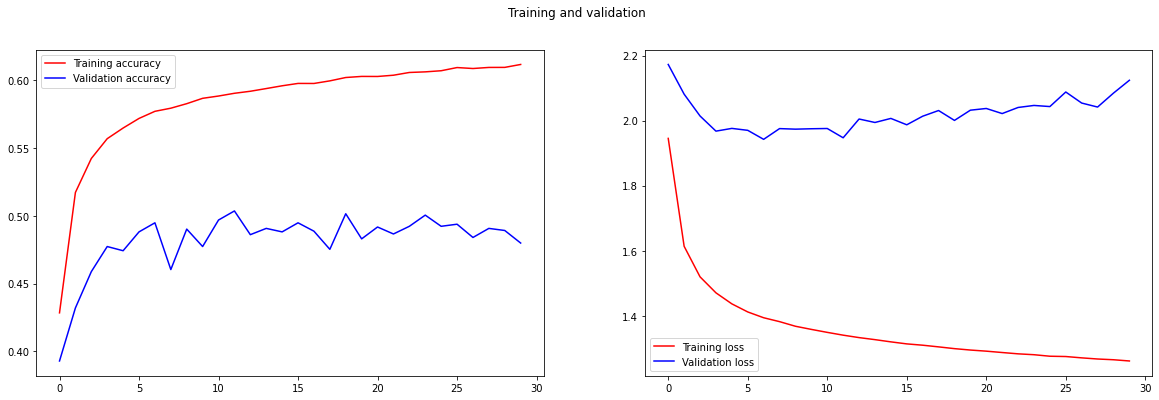

In [62]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [63]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

#### functions to get next probable characters

In [64]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [65]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [66]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

#### Prediction words

In [67]:
quotes = [   
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [68]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 
['the ', 'a ', 'his ', 'my ', 'she ']

that which does not kill us makes us str
['eet, ', 'ong ', 'ick ', 'ang ', 'uck ']

i'm not upset that you lied to me, i'm u
['sed ', 'nderstand ', 'pon ', 're ', 'dder ']

and those who were seen dancing were tho
['ught ', 'se ', 'oly ', 'ble ', 'me ']

it is hard enough to remember my opinion
[' and ', '. ', ', ', 's ', 'al ']

